In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [77]:
df = pd.read_csv('concrete_data.csv')

In [78]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [79]:
df.shape

(1030, 9)

In [80]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [81]:
df.describe() 

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [82]:
X = df.drop(columns=['Strength'])
Y = df.iloc[:,-1]

In [83]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [84]:
lr = LinearRegression()

lr.fit(X_train,Y_train)

pred = lr.predict(X_test)

r2_score(Y_test,pred)

0.627553179231485

In [85]:
lr = LinearRegression()
np.mean(cross_val_score(lr,X,Y,scoring='r2'))#by deafault cv = 10

0.46099404916628606

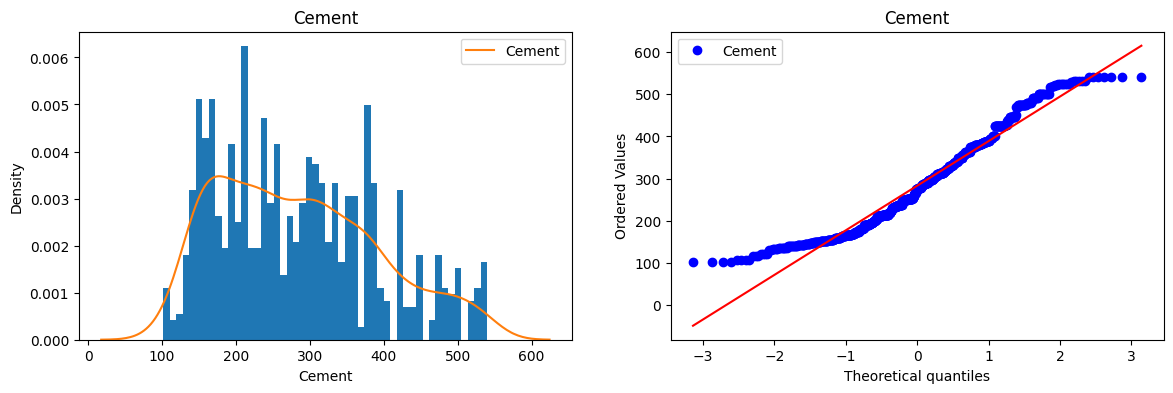

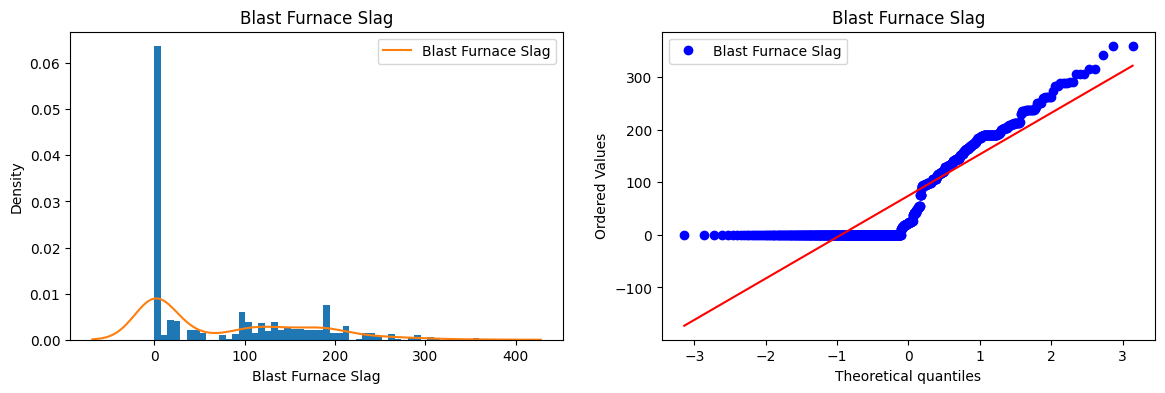

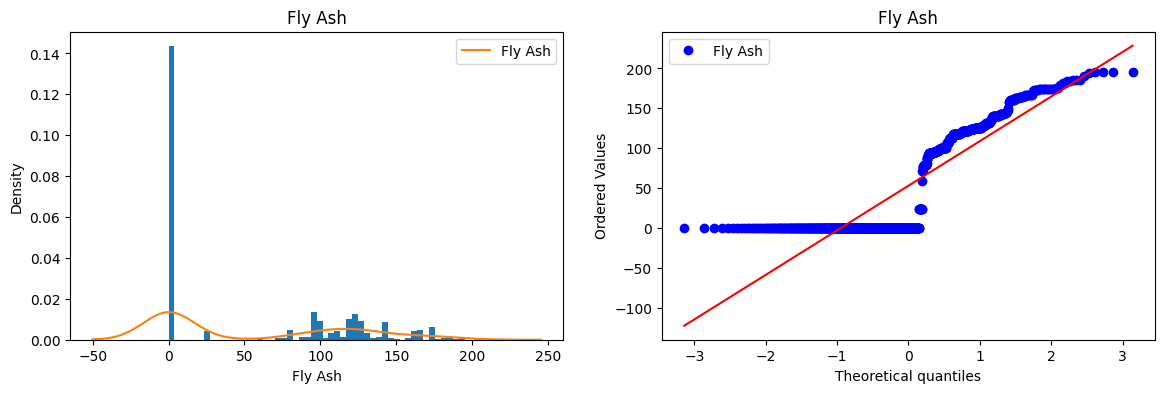

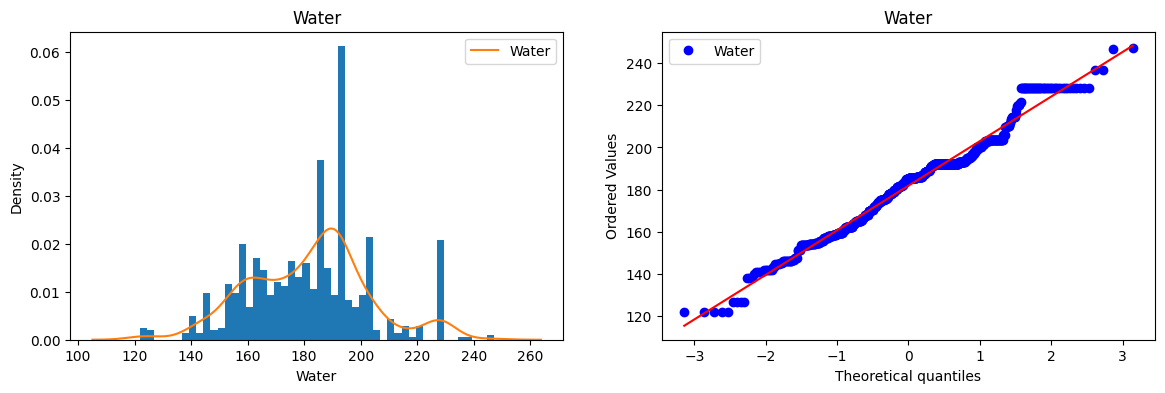

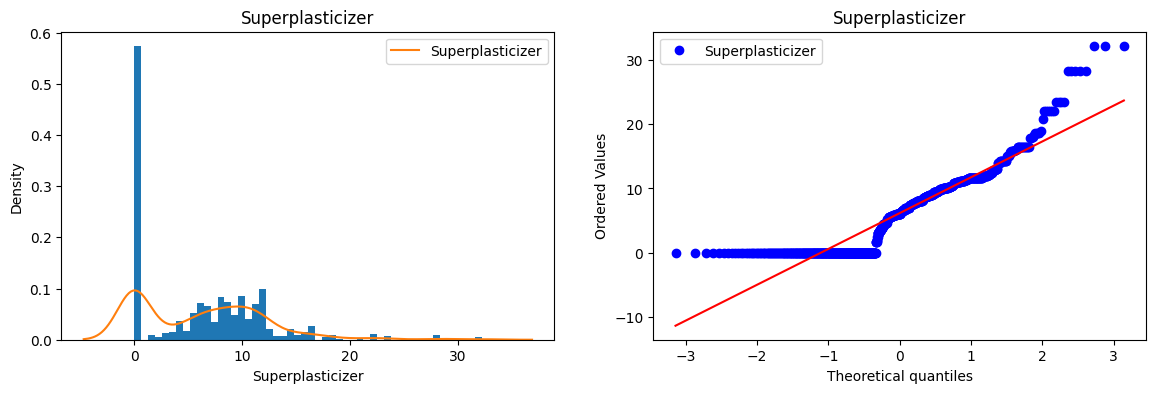

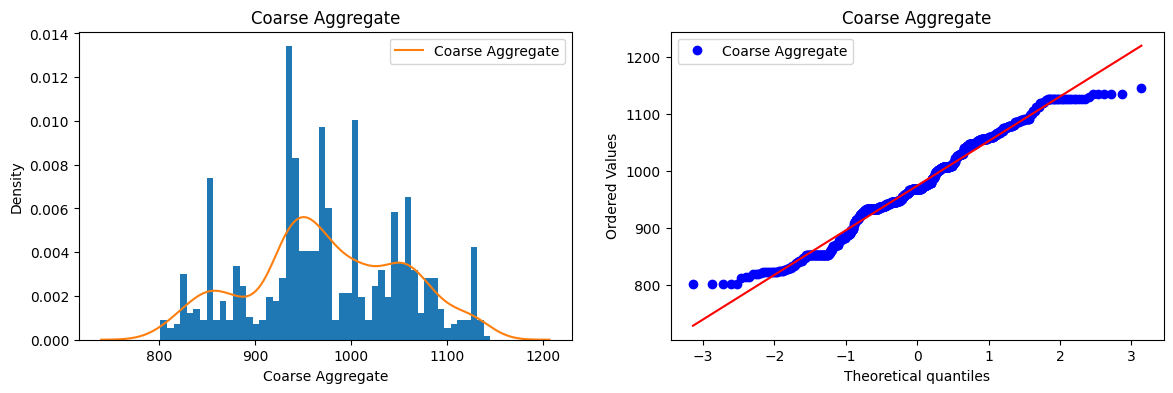

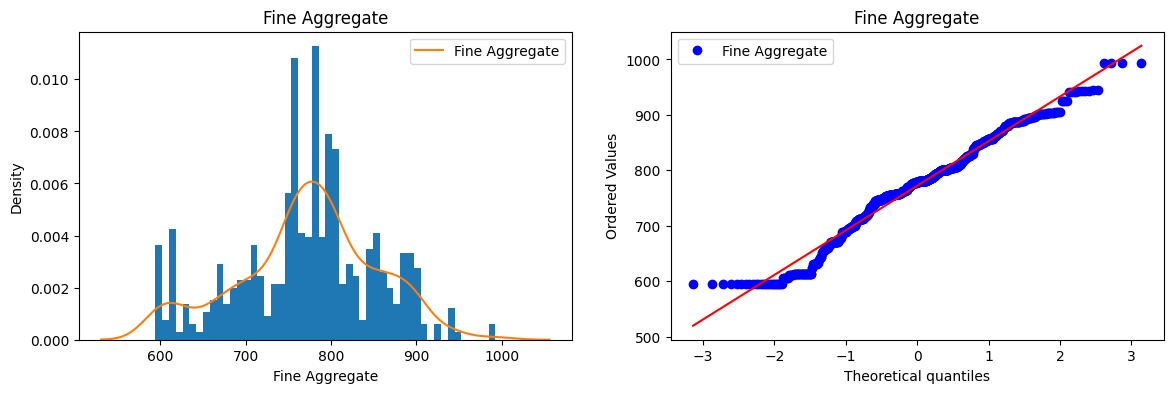

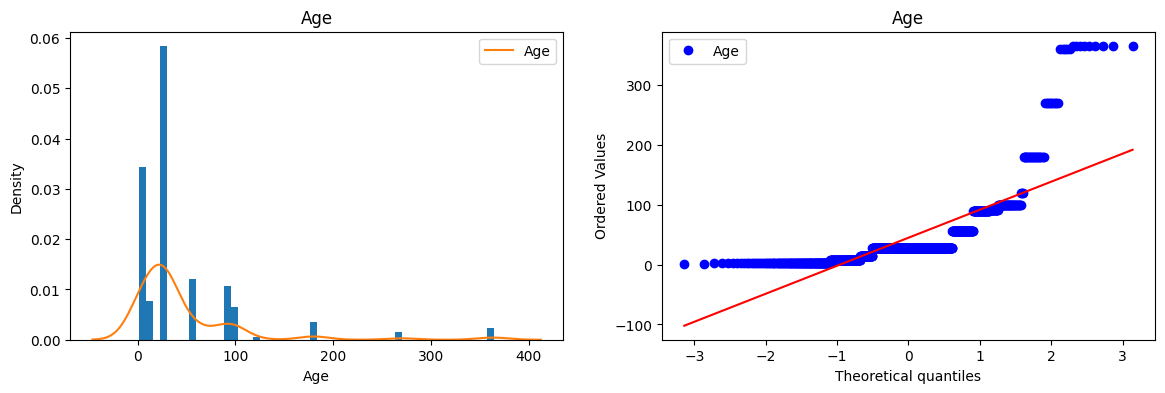

In [86]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X_train[col],50, density=True)
    sns.kdeplot(X_train[col])
    plt.title(col)
    plt.legend([col])

    plt.subplot(122)
    stats.probplot(X_train[col],dist="norm",plot=plt)
    plt.title(col)
    plt.legend([col])
    plt.show()


In [87]:
pt_box_cox = PowerTransformer(method = 'box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.fit_transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})
#pt.lambdas_ will give lambda corresponding to each feature which best for its transformation.

,cols,box_cox_lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [88]:
X_test_transformed

array([[ 0.06059325,  0.91323565, -0.97700411, ..., -0.52588088,
        -1.39591076,  2.16842563],
       [ 1.00903784,  1.13347154, -0.97700411, ..., -0.35483669,
        -0.35659503, -1.02964823],
       [ 1.24056893,  1.13347154, -0.97700411, ..., -0.35483669,
        -0.35659503,  0.13392182],
       ...,
       [ 0.28004204,  1.16027191, -0.97700411, ...,  0.45779787,
         0.27655477, -1.02964823],
       [ 1.51252958,  0.22234681,  1.07319414, ..., -1.98805682,
        -0.43068868,  0.70804561],
       [ 0.79758596, -1.05997507, -0.97700411, ..., -0.03988185,
        -0.02821909,  1.09154198]])

In [89]:
lr = LinearRegression()

lr.fit(X_train_transformed,Y_train)

pred = lr.predict(X_test_transformed)

r2_score(Y_test,pred)

0.8153845538583409

In [90]:
pt_box_cox = PowerTransformer(method='box-cox')
X_transformed = pt_box_cox.fit_transform(X+0.000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,Y,scoring='r2'))

0.6662950327879319

In [91]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [92]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

In [93]:
X_train_transformed

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,1.018168,1.130993,-0.301917,1.250424,-0.262504,-0.677567,0.105778
1,1.244813,0.222584,1.166671,-0.165051,0.643937,-1.912717,-0.314063,0.105778
2,0.079751,-1.056928,1.143637,-1.047299,0.796163,1.018407,0.025954,-1.664976
3,-0.145770,0.835725,1.009267,0.581232,0.585508,-1.750770,0.583249,0.105778
4,-1.131111,0.487511,1.150162,-1.105305,0.886463,1.368579,0.262619,-1.664976
...,...,...,...,...,...,...,...,...
819,0.183530,1.146737,-0.884932,-1.769937,0.924953,0.390560,0.358772,-1.664976
820,-0.198870,-1.056928,1.151932,-1.839142,0.999192,1.445978,0.322793,-0.491262
821,-0.844661,-1.056928,1.152152,-0.706091,0.796163,1.345370,0.297153,1.257511
822,1.565741,0.921796,-0.884932,-0.019305,0.689050,-1.537249,0.076208,0.105778


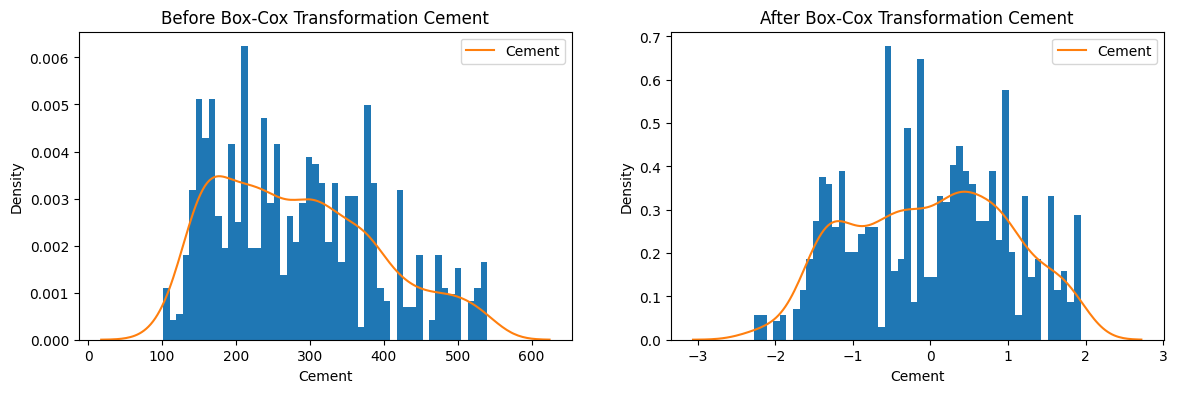

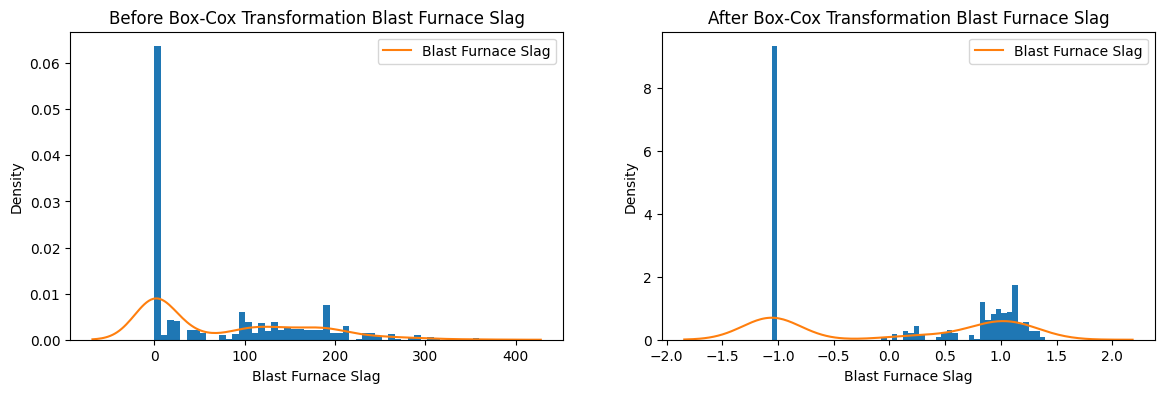

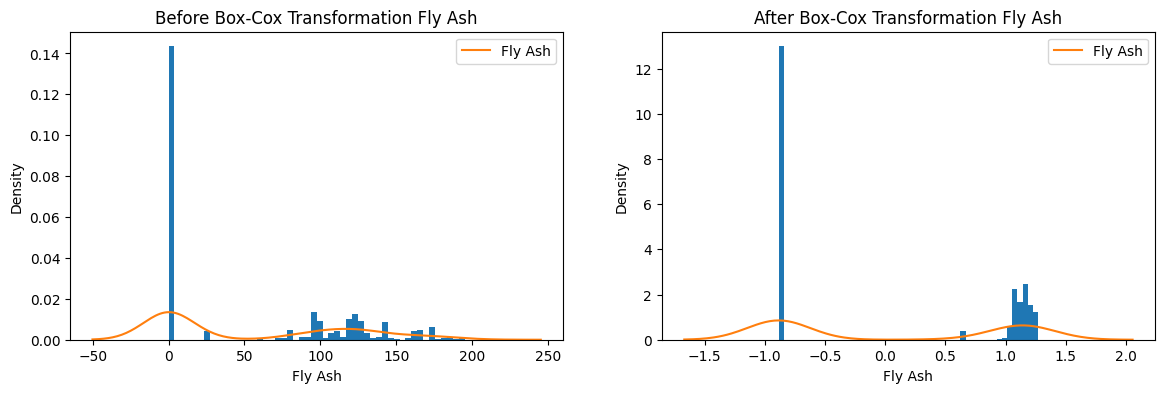

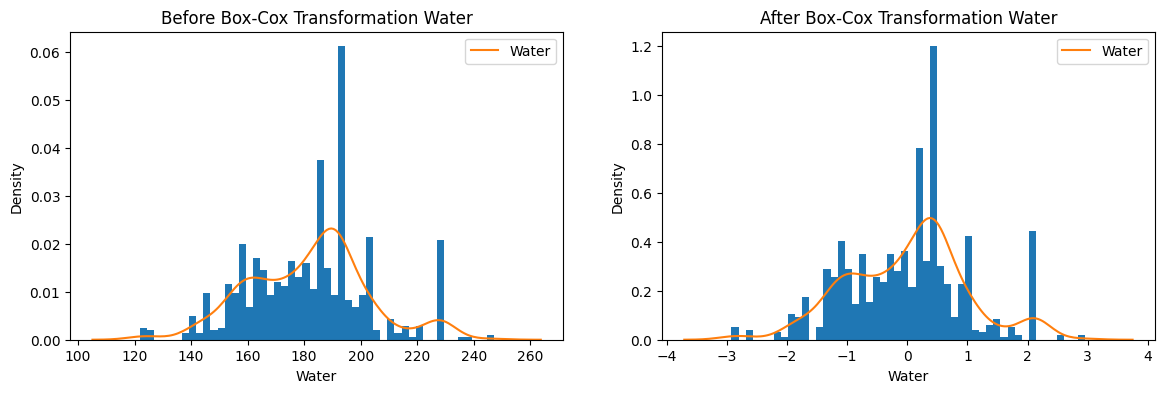

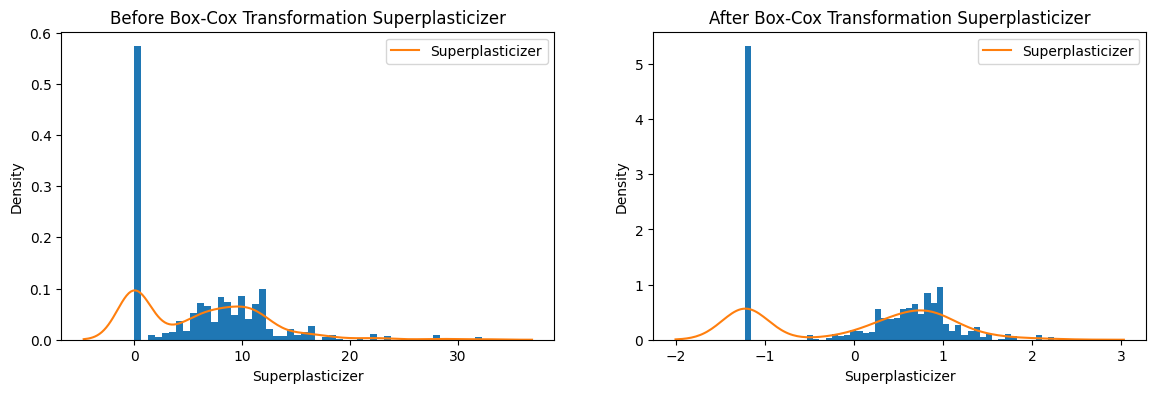

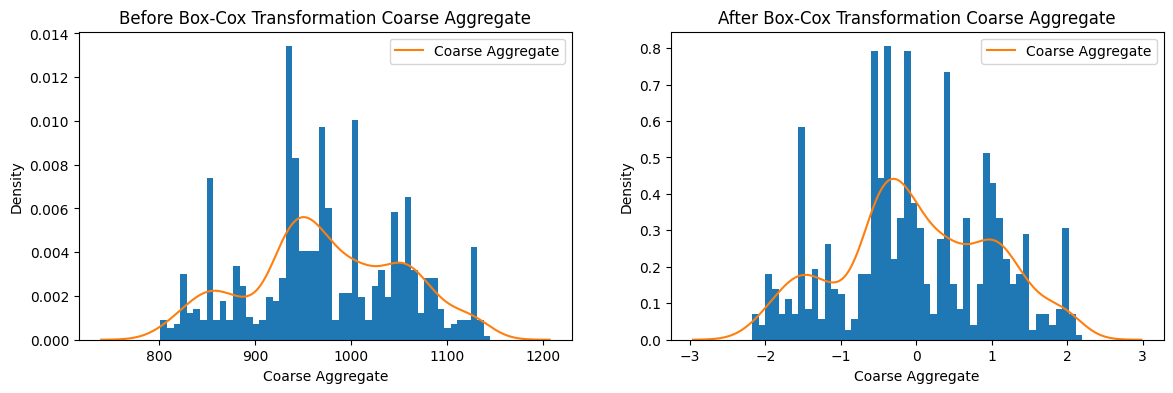

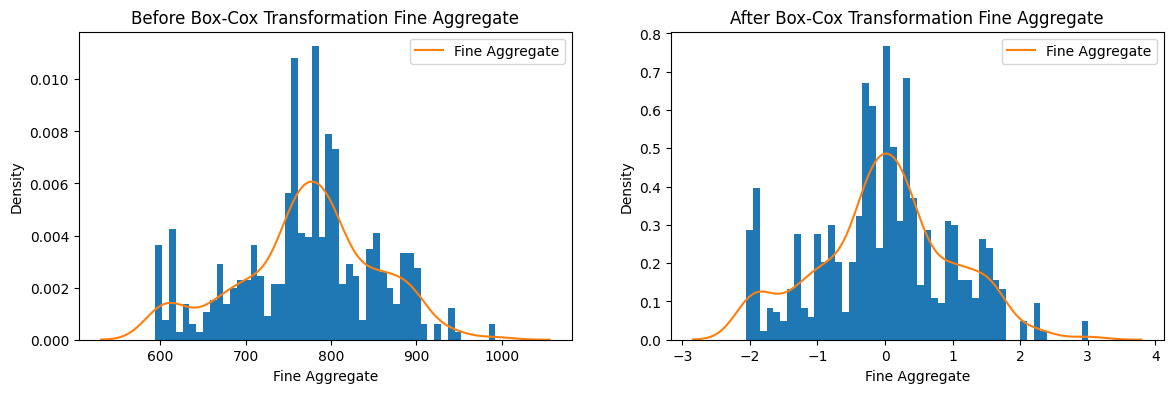

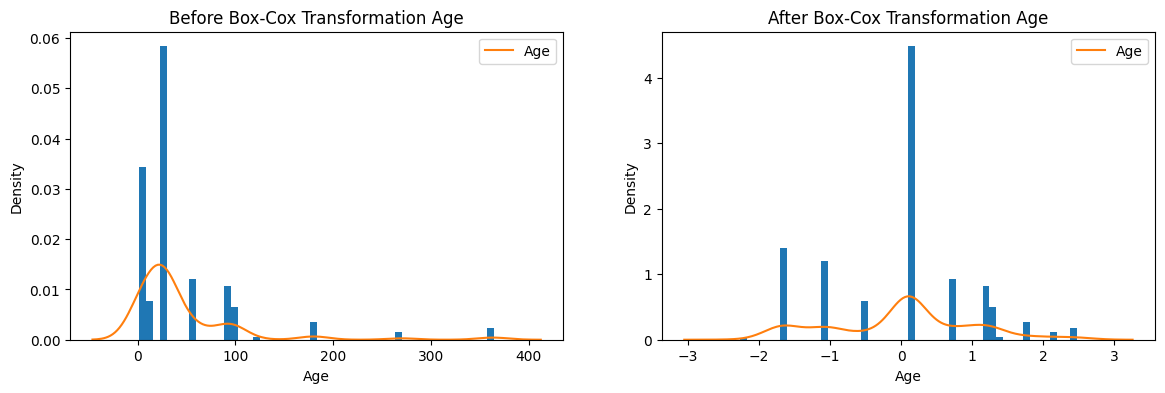

In [94]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X_train[col],50, density=True)
    sns.kdeplot(X_train[col])
    plt.title(f'Before Box-Cox Transformation {col}')
    plt.legend([col])

    plt.subplot(122)
    plt.hist(X_train_transformed[col],50, density=True)
    sns.kdeplot(X_train_transformed[col])
    plt.title(f'After Box-Cox Transformation {col}')
    plt.legend([col])
    plt.show()

In [95]:
pt_yeo_johnson= PowerTransformer() # by default Yeo Johnson

X_train_transformed = pt_yeo_johnson.fit_transform(X_train)
X_test_transformed = pt_yeo_johnson.fit_transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed,Y_train)

pred = lr.predict(X_test_transformed)

r2_score(Y_test,pred)

0.8153845514592458

In [96]:
pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambda':pt_yeo_johnson.lambdas_})

,cols,Yeo_Johnson_lambda
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [97]:
pt_yeo_johnson =  PowerTransformer()

X_transformed = pt_yeo_johnson.fit_transform(X)

lr = LinearRegression()

np.mean(cross_val_score(lr,X_transformed,Y,scoring='r2'))

0.6834625141500866

In [98]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

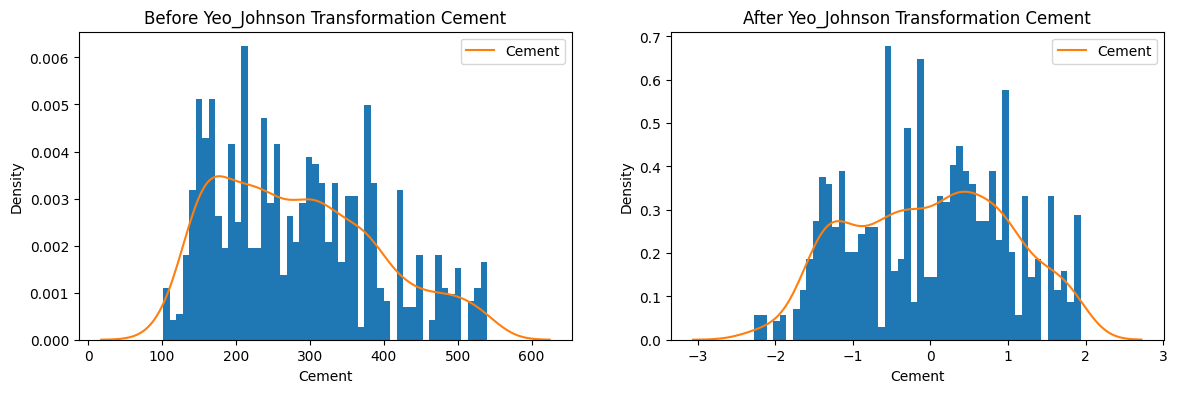

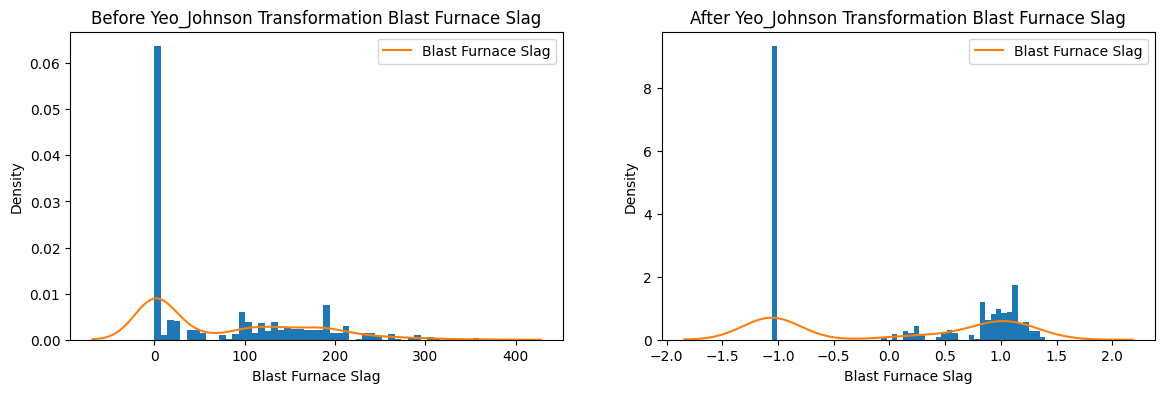

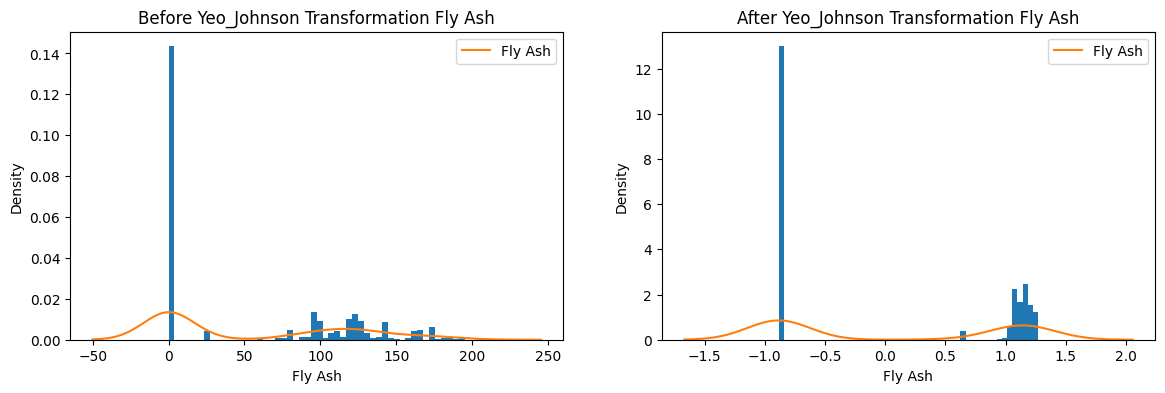

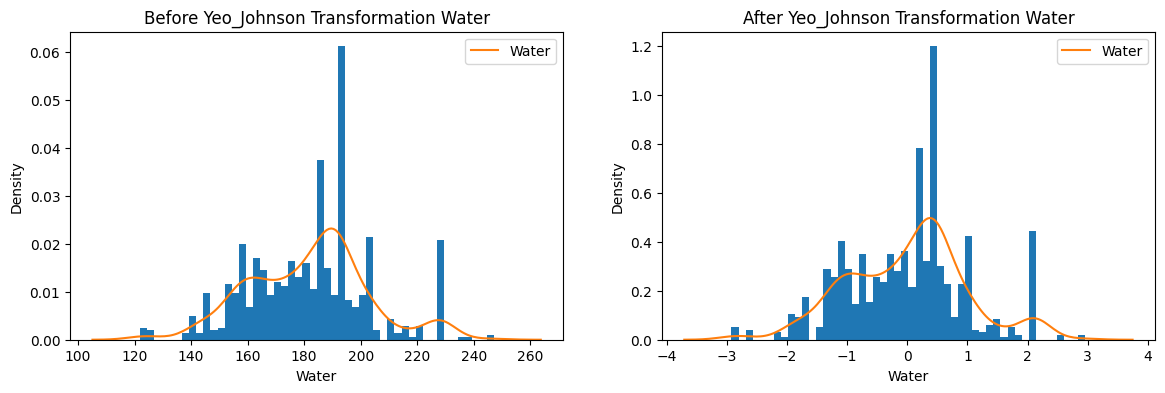

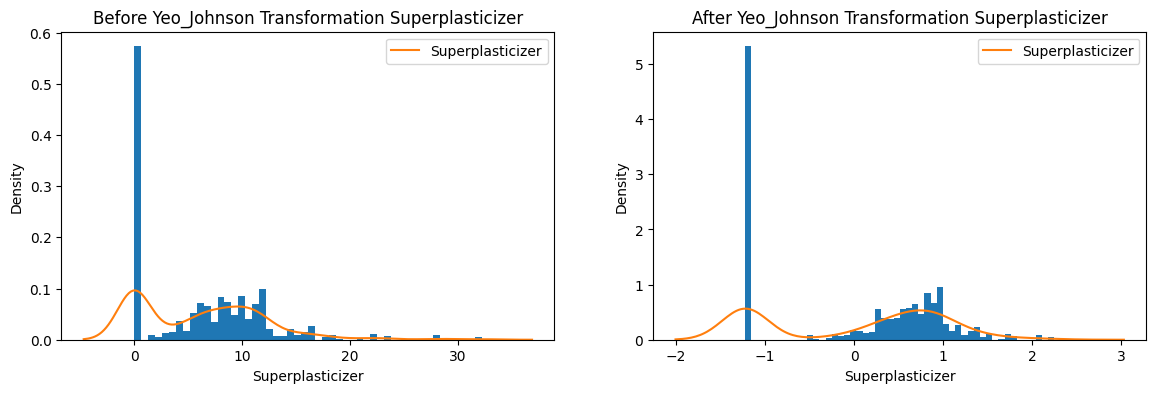

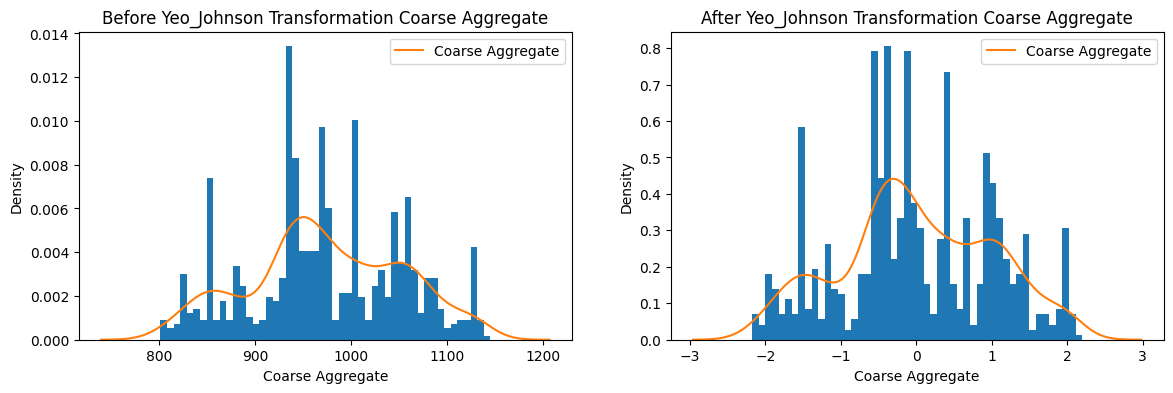

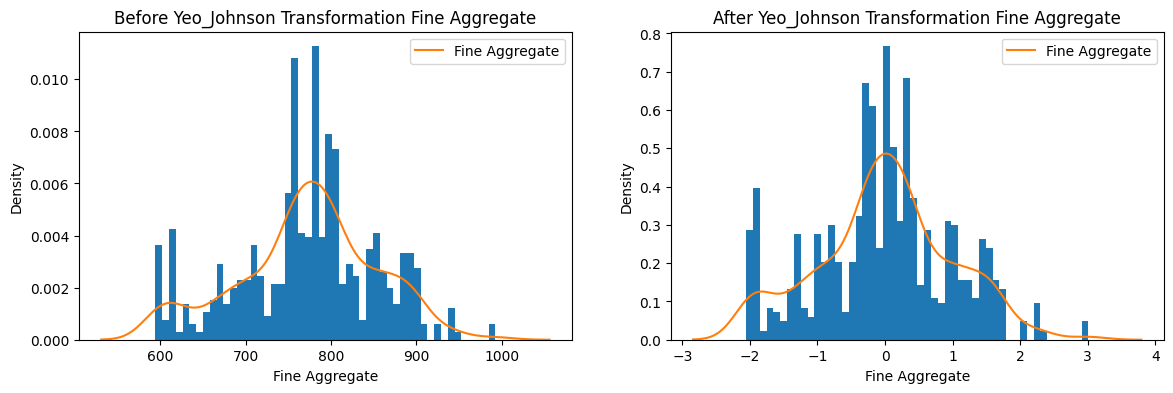

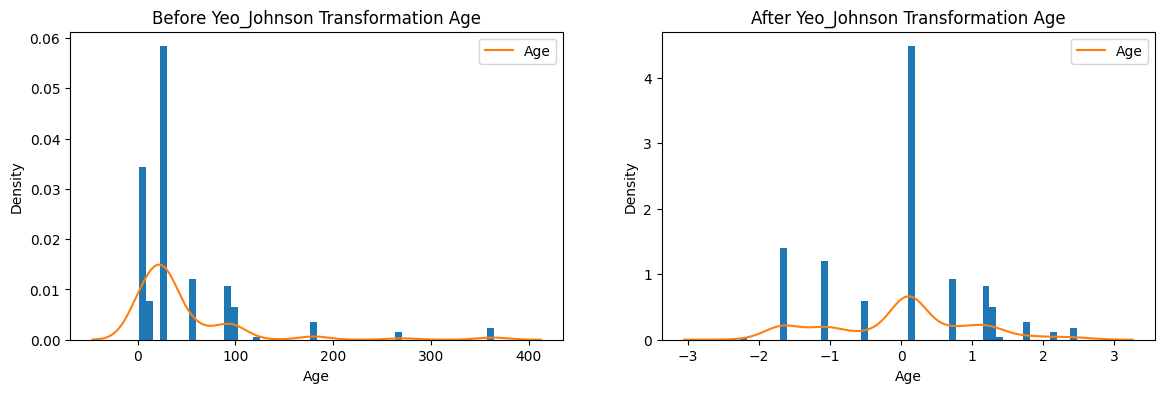

In [99]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X_train[col],50, density=True)
    sns.kdeplot(X_train[col])
    plt.title(f'Before Yeo_Johnson Transformation {col}')
    plt.legend([col])

    plt.subplot(122)
    plt.hist(X_train_transformed[col],50, density=True)
    sns.kdeplot(X_train_transformed[col])
    plt.title(f'After Yeo_Johnson Transformation {col}')
    plt.legend([col])
    plt.show()

## Note:
    1. No much negative value hence will not able to see much change when box-cox is compared to Yeo-Johnson under this dataset.

In [100]:
pd.DataFrame({'cols':X_train.columns,'box_cox_lambda':pt_box_cox.lambdas_,'yeo_johnson_lambda':pt_yeo_johnson.lambdas_})

,cols,box_cox_lambda,yeo_johnson_lambda
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.025273,0.016633
2,Fly Ash,-0.032412,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.099711,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830763
7,Age,0.048975,0.001771
